In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
#largecap stock INFOSYS
stock = "INFY.NS"
data = yf.download(stock, '2021-06-11', '2023-06-10')

print(data)

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2021-06-11  1430.099976  1451.599976  1429.449951  1446.900024  1366.812012  \
2021-06-14  1471.000000  1477.000000  1453.449951  1461.800049  1380.887329   
2021-06-15  1464.000000  1476.000000  1463.000000  1473.900024  1392.317505   
2021-06-16  1472.699951  1489.449951  1467.500000  1480.599976  1398.646606   
2021-06-17  1475.099976  1502.650024  1475.099976  1495.300049  1412.532959   
...                 ...          ...          ...          ...          ...   
2023-06-05  1304.000000  1309.449951  1297.300049  1304.500000  1304.500000   
2023-06-06  1288.599976  1288.599976  1273.000000  1279.000000  1279.000000   
2023-06-07  1290.500000  1294.000000  1282.500000  1288.949951  1288.949951   
2023-06-08  1286.199951  1292.000000  1281.099976  1282.800049

In [3]:
#ATR is over last 20 periods
data['TR'] = np.maximum(abs(data['High'] - data['Low']), abs(data['High'] - data['Adj Close'].shift(1)), abs(data['Low'] - data['Adj Close'].shift(1)))
data['ATR'] = data['TR'].rolling(20).mean()

print((data['ATR']).tail(476))

Date
2021-07-09    100.662903
2021-07-12    100.233942
2021-07-13    100.189600
2021-07-14    101.501239
2021-07-15    101.662744
                 ...    
2023-06-05     43.178143
2023-06-06     41.985004
2023-06-07     40.775134
2023-06-08     39.022589
2023-06-09     38.296973
Name: ATR, Length: 476, dtype: float64


In [4]:
#EMA is over last 20 periods
data['Middle'] = data['Adj Close'].ewm(span = 20).mean()

print((data['Middle']).tail(476))

Date
2021-07-09    1465.331136
2021-07-12    1464.993087
2021-07-13    1464.404866
2021-07-14    1467.044998
2021-07-15    1469.768629
                 ...     
2023-06-05    1269.988192
2023-06-06    1270.846460
2023-06-07    1272.570602
2023-06-08    1273.544835
2023-06-09    1272.821512
Name: Middle, Length: 476, dtype: float64


In [5]:
data['Upper'] = data['Middle'] + 2 * data['ATR']

print(data['Upper'].tail(476))

Date
2021-07-09    1666.656942
2021-07-12    1665.460970
2021-07-13    1664.784066
2021-07-14    1670.047476
2021-07-15    1673.094117
                 ...     
2023-06-05    1356.344479
2023-06-06    1354.816467
2023-06-07    1354.120870
2023-06-08    1351.590013
2023-06-09    1349.415458
Name: Upper, Length: 476, dtype: float64


In [6]:
data['Lower'] = data['Middle'] - 2 * data['ATR']

print(data['Lower'].tail(476))

Date
2021-07-09    1264.005330
2021-07-12    1264.525204
2021-07-13    1264.025667
2021-07-14    1264.042520
2021-07-15    1266.443141
                 ...     
2023-06-05    1183.631906
2023-06-06    1186.876452
2023-06-07    1191.020333
2023-06-08    1195.499656
2023-06-09    1196.227567
Name: Lower, Length: 476, dtype: float64


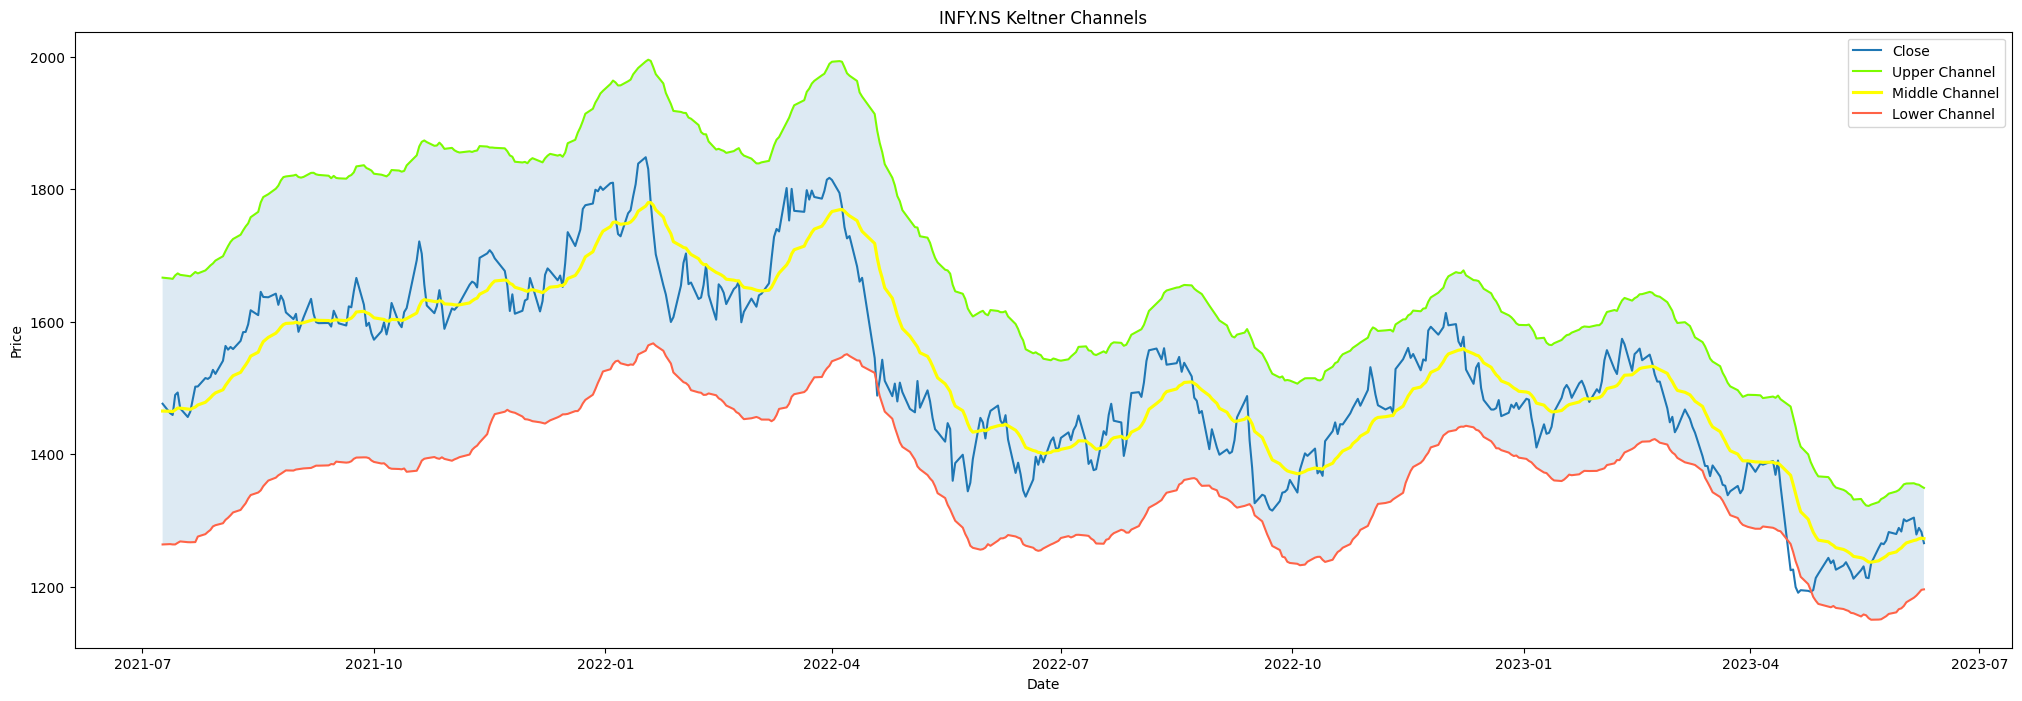

In [7]:
plt.figure(figsize=(25, 8))
plt.plot(data.tail(476).index, data['Adj Close'].tail(476), label='Close')
plt.plot(data.tail(476).index, data['Upper'].tail(476), label='Upper Channel', color='lawngreen')
plt.plot(data.tail(476).index, data['Middle'].tail(476), label='Middle Channel', color='yellow', linewidth=2.25)
plt.plot(data.tail(476).index, data['Lower'].tail(476), label='Lower Channel', color='tomato')
plt.fill_between(data.tail(476).index, data['Upper'].tail(476), data['Lower'].tail(476), alpha = 0.15)
plt.title('INFY.NS Keltner Channels')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [8]:
#Lowest of Lows is over last 14 periods
data['Lowest'] = data['Low'].rolling(14).min()

print(data['Lowest'].tail(483))

Date
2021-06-30    1429.449951
2021-07-01    1453.449951
2021-07-02    1463.000000
2021-07-05    1467.500000
2021-07-06    1475.099976
                 ...     
2023-06-05    1242.449951
2023-06-06    1242.449951
2023-06-07    1252.800049
2023-06-08    1270.250000
2023-06-09    1264.000000
Name: Lowest, Length: 483, dtype: float64


In [9]:
#Highest of Highs is over last 14 periods
data['Highest'] = data['High'].rolling(14).max()

print(data['Highest'].tail(483))

Date
2021-06-30    1591.000000
2021-07-01    1591.000000
2021-07-02    1591.000000
2021-07-05    1591.000000
2021-07-06    1591.000000
                 ...     
2023-06-05    1332.699951
2023-06-06    1332.699951
2023-06-07    1332.699951
2023-06-08    1332.699951
2023-06-09    1332.699951
Name: Highest, Length: 483, dtype: float64


In [10]:
data['%K'] = (data['Adj Close'] - data['Lowest'])/(data['Highest'] - data['Lowest']) * 100

print(data['%K'].tail(483))

Date
2021-06-30    39.523718
2021-07-01    14.961617
2021-07-02    14.078236
2021-07-05    19.475997
2021-07-06     0.543471
                ...    
2023-06-05    68.753517
2023-06-06    40.498669
2023-06-07    45.243988
2023-06-08    20.096171
2023-06-09     2.838359
Name: %K, Length: 483, dtype: float64


In [11]:
data['%D'] = data['%K'].rolling(3).mean()

print(data['%D'].tail(481))

Date
2021-07-02    22.854524
2021-07-05    16.171950
2021-07-06    11.365901
2021-07-07     4.737177
2021-07-08    -4.825933
                ...    
2023-06-05    65.798761
2023-06-06    57.303840
2023-06-07    51.498725
2023-06-08    35.279609
2023-06-09    22.726173
Name: %D, Length: 481, dtype: float64


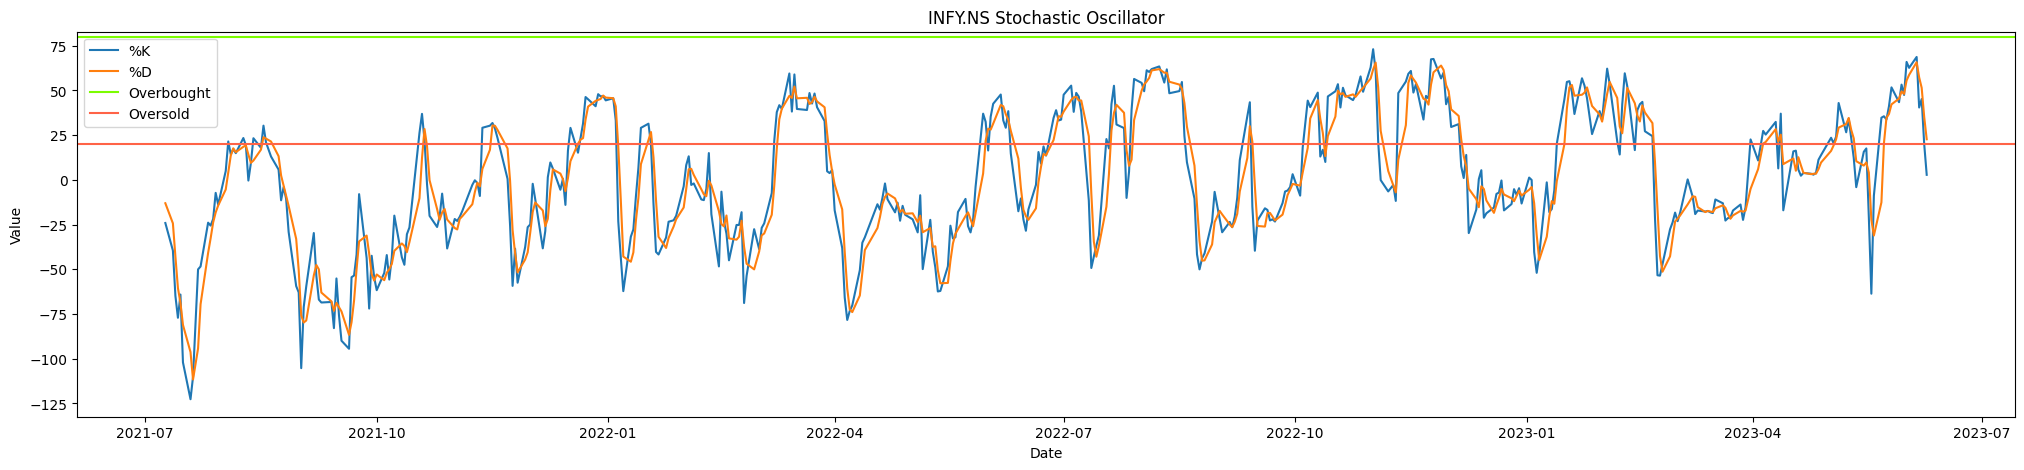

In [12]:
plt.figure(figsize=(25, 5))
plt.plot(data.tail(476).index, data['%K'].tail(476), label='%K')
plt.plot(data.tail(476).index, data['%D'].tail(476), label='%D')
plt.axhline(80, label='Overbought', color='lawngreen')
plt.axhline(20, label='Oversold', color='tomato')
plt.title('INFY.NS Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [13]:
data['Signal'] = 0

#SELL
data.loc[(data['%K'] > data['%D']) & (data['Adj Close'] > data['Upper']), 'Signal'] = -1

#BUY
data.loc[(data['%K'] < data['%D']) & (data['Adj Close'] < data['Lower']), 'Signal'] = 1

print(data['Signal'].tail(496))

Date
2021-06-11    0
2021-06-14    0
2021-06-15    0
2021-06-16    0
2021-06-17    0
             ..
2023-06-05    0
2023-06-06    0
2023-06-07    0
2023-06-08    0
2023-06-09    0
Name: Signal, Length: 496, dtype: int64


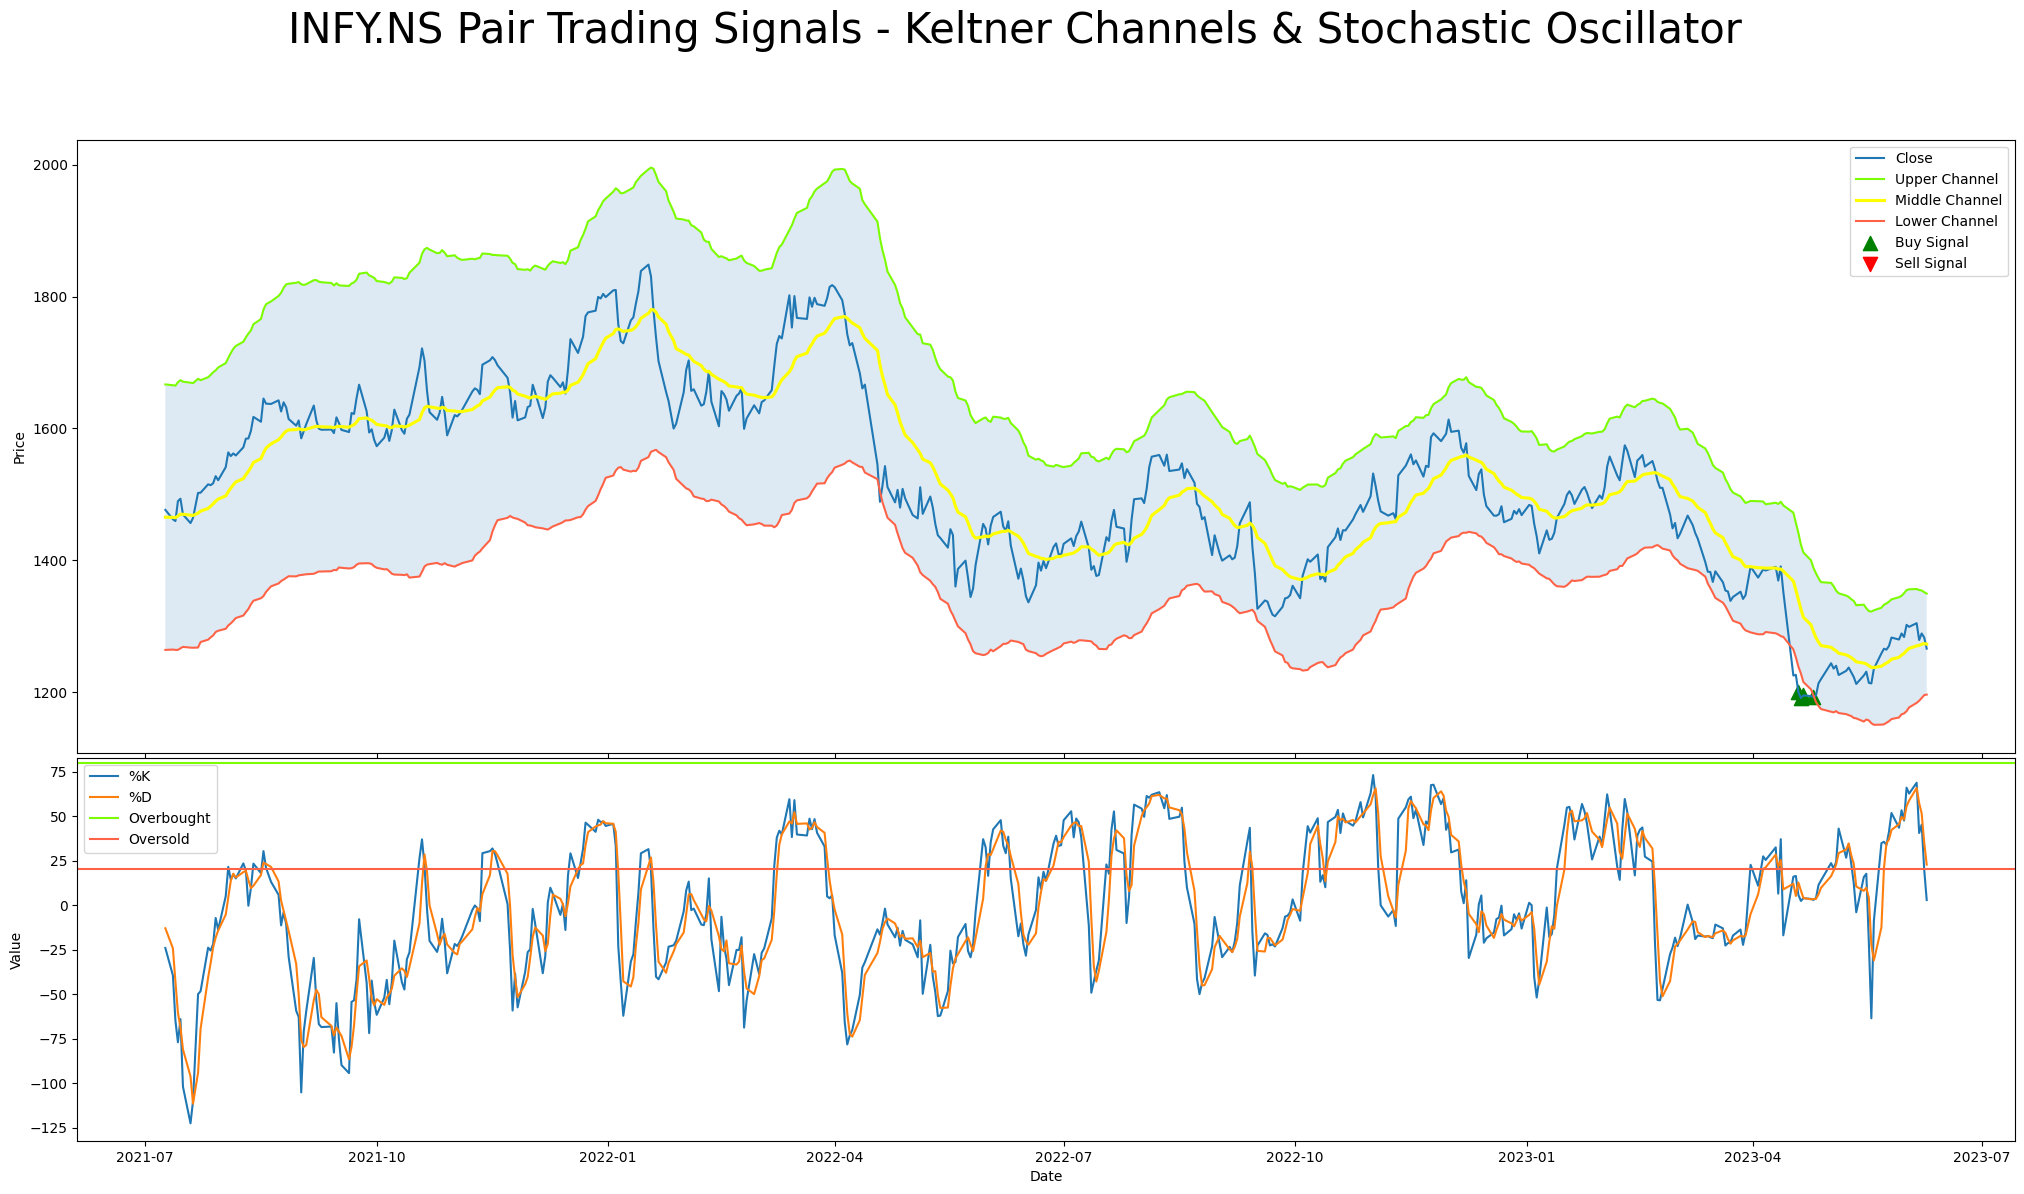

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(25, 13), gridspec_kw={'height_ratios': [8, 5]})

ax1.plot(data.tail(476).index, data['Adj Close'].tail(476), label='Close')
ax1.plot(data.tail(476).index, data['Upper'].tail(476), label='Upper Channel', color='lawngreen')
ax1.plot(data.tail(476).index, data['Middle'].tail(476), label='Middle Channel', color='yellow', linewidth=2.25)
ax1.plot(data.tail(476).index, data['Lower'].tail(476), label='Lower Channel', color='tomato')
ax1.fill_between(data.tail(476).index, data['Upper'].tail(476), data['Lower'].tail(476), alpha=0.15)
ax1.scatter(data[data['Signal'] == 1].tail(476).index, data[data['Signal'] == 1]['Adj Close'].tail(476), color='green', marker='^', s=105, label='Buy Signal')
ax1.scatter(data[data['Signal'] == -1].tail(476).index, data[data['Signal'] == -1]['Adj Close'].tail(476), color='red', marker='v', s=105, label='Sell Signal')
ax1.set_ylabel('Price')
ax1.legend()

ax2.plot(data.tail(476).index, data['%K'].tail(476), label='%K')
ax2.plot(data.tail(476).index, data['%D'].tail(476), label='%D')
ax2.axhline(80, label='Overbought', color='lawngreen')
ax2.axhline(20, label='Oversold', color='tomato')
ax2.set_ylabel('Value')
ax2.set_xlabel('Date')
ax2.legend()

plt.subplots_adjust(hspace=0.01)
fig.suptitle('INFY.NS Pair Trading Signals - Keltner Channels & Stochastic Oscillator', fontsize=30)
plt.show()

In [15]:
#daily returns rate
data['Return'] = data['Adj Close'].pct_change()

#daily strategy returns rate
data['Strategy_Return'] = data['Signal'].shift(1) * data['Return']

#cumulative daily returns rate of strategy 
data['Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod() - 1

print(data['Return'].tail(495))
print("")
print(data['Strategy_Return'].tail(495))
print("")
print(data['Cumulative_Return'].tail(495))

Date
2021-06-14    0.010298
2021-06-15    0.008277
2021-06-16    0.004546
2021-06-17    0.009928
2021-06-18    0.005350
                ...   
2023-06-05    0.004234
2023-06-06   -0.019548
2023-06-07    0.007779
2023-06-08   -0.004771
2023-06-09   -0.013135
Name: Return, Length: 495, dtype: float64

Date
2021-06-14    0.0
2021-06-15    0.0
2021-06-16    0.0
2021-06-17    0.0
2021-06-18    0.0
             ... 
2023-06-05    0.0
2023-06-06   -0.0
2023-06-07    0.0
2023-06-08   -0.0
2023-06-09   -0.0
Name: Strategy_Return, Length: 495, dtype: float64

Date
2021-06-14    0.000000
2021-06-15    0.000000
2021-06-16    0.000000
2021-06-17    0.000000
2021-06-18    0.000000
                ...   
2023-06-05   -0.002635
2023-06-06   -0.002635
2023-06-07   -0.002635
2023-06-08   -0.002635
2023-06-09   -0.002635
Name: Cumulative_Return, Length: 495, dtype: float64


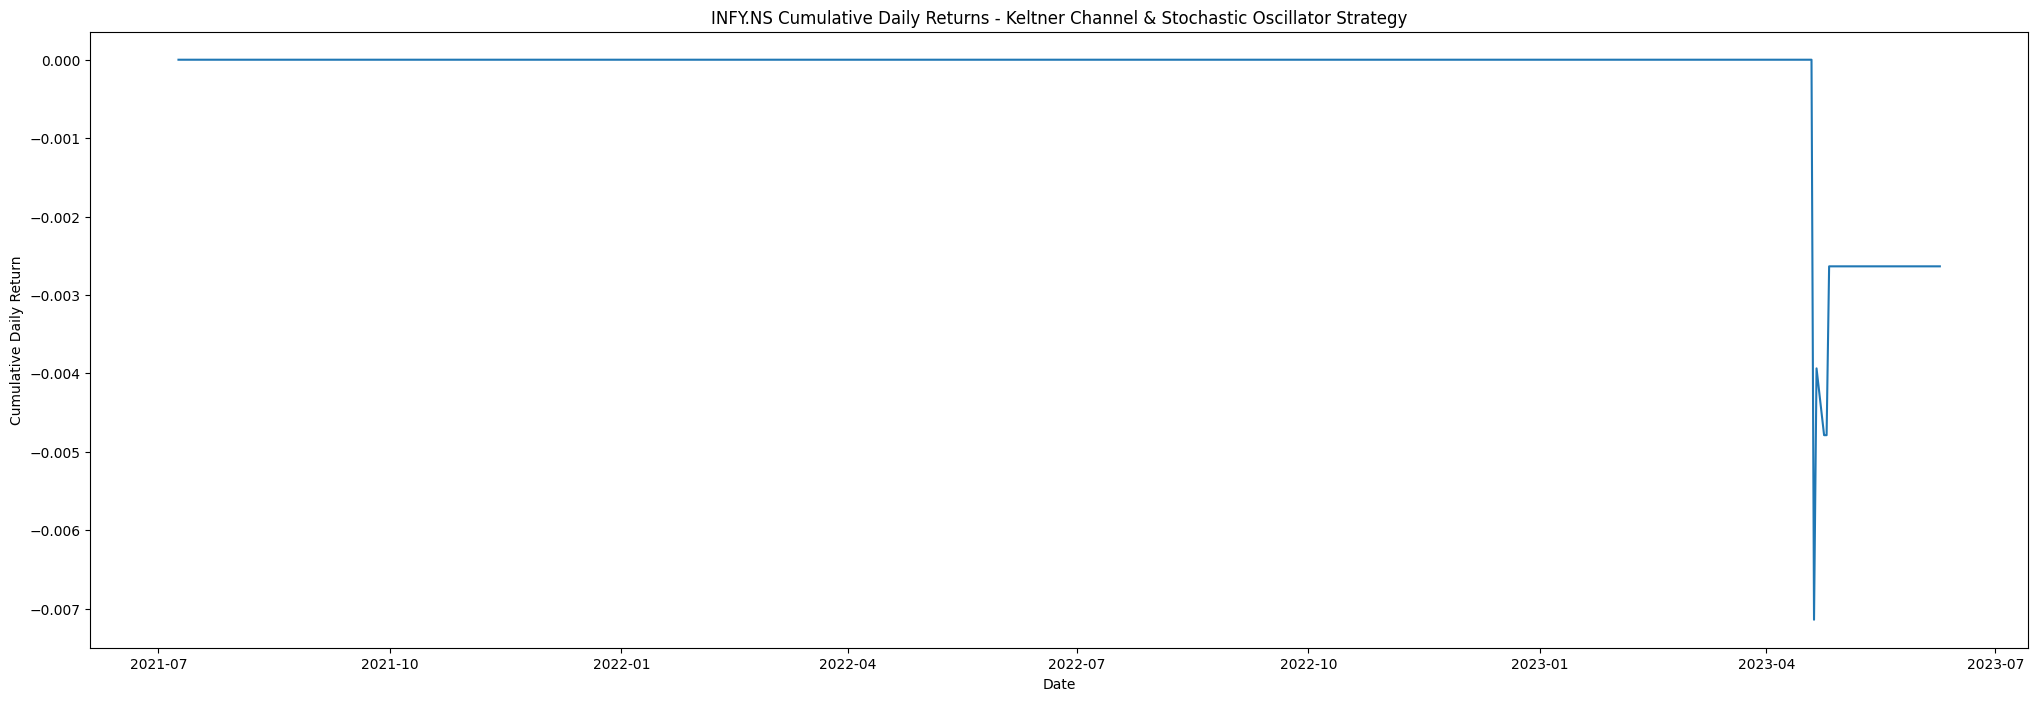

In [16]:
plt.figure(figsize=(25, 8))
plt.plot(data.tail(476).index, data['Cumulative_Return'].tail(476))
plt.title('INFY.NS Cumulative Daily Returns - Keltner Channel & Stochastic Oscillator Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Daily Return')
plt.show()

In [17]:
index = '^NSEI'
index_data = yf.download(index,'2021-06-11','2023-06-10')

print(index_data)

[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close   
Date                                                                 
2021-06-11  15796.450195  15835.549805  15749.799805  15799.349609  \
2021-06-14  15791.400391  15823.049805  15606.500000  15811.849609   
2021-06-15  15866.950195  15901.599609  15842.400391  15869.250000   
2021-06-16  15847.500000  15880.849609  15742.599609  15767.549805   
2021-06-17  15648.299805  15769.349609  15616.750000  15691.400391   
...                  ...           ...           ...           ...   
2023-06-05  18612.000000  18640.150391  18582.800781  18593.849609   
2023-06-06  18600.800781  18622.750000  18531.599609  18599.000000   
2023-06-07  18665.599609  18738.949219  18636.000000  18726.400391   
2023-06-08  18725.349609  18777.900391  18615.599609  18634.550781   
2023-06-09  18655.900391  18676.650391  18555.400391  18563.400391   

               Adj C

In [18]:
index_data['TR'] = np.maximum(abs(index_data['High'] - index_data['Low']), abs(index_data['High'] - index_data['Adj Close'].shift(1)), abs(index_data['Low'] - index_data['Adj Close'].shift(1)))
index_data['ATR'] = index_data['TR'].rolling(20).mean()
index_data['Middle'] = index_data['Adj Close'].ewm(span = 20).mean()
index_data['Upper'] = index_data['Middle'] + 2 * index_data['ATR']
index_data['Lower'] = index_data['Middle'] - 2 * index_data['ATR']

index_data['Lowest'] = index_data['Low'].rolling(14).min()
index_data['Highest'] = index_data['High'].rolling(14).max()
index_data['%K'] = (index_data['Adj Close'] - index_data['Lowest'])/(index_data['Highest'] - index_data['Lowest']) * 100
index_data['%D'] = index_data['%K'].rolling(3).mean()

In [19]:
index_data['Signal'] = 0

#SELL
index_data.loc[(index_data['%K'] > index_data['%D']) & (index_data['Adj Close'] > index_data['Upper']), 'Signal'] = -1

#BUY
index_data.loc[(index_data['%K'] < index_data['%D']) & (index_data['Adj Close'] < index_data['Lower']), 'Signal'] = 1

print(index_data['Signal'].tail(496))

Date
2021-06-11    0
2021-06-14    0
2021-06-15    0
2021-06-16    0
2021-06-17    0
             ..
2023-06-05    0
2023-06-06    0
2023-06-07   -1
2023-06-08    0
2023-06-09    0
Name: Signal, Length: 496, dtype: int64


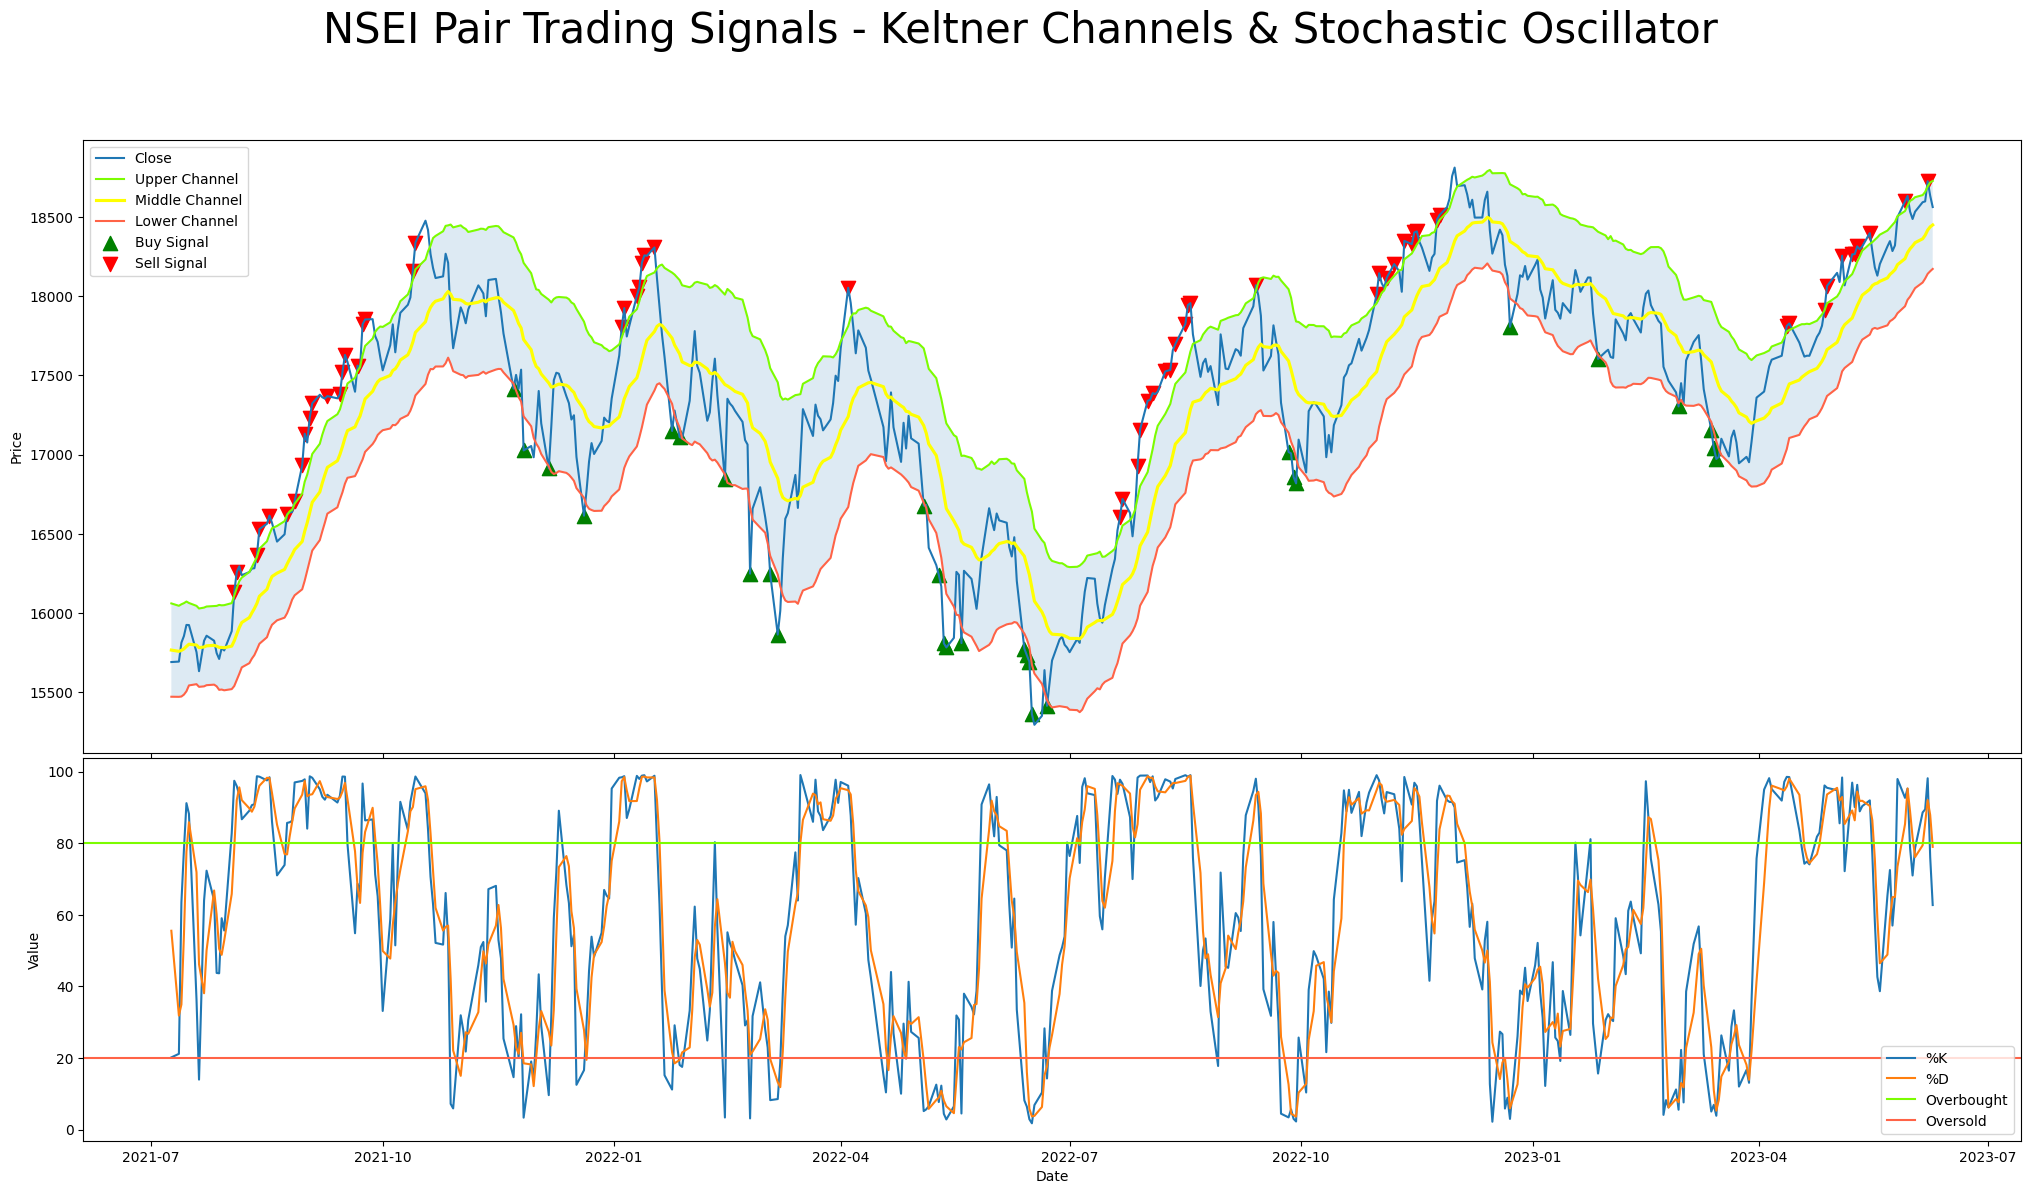

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(25, 13), gridspec_kw={'height_ratios': [8, 5]})

ax1.plot(index_data.tail(476).index, index_data['Adj Close'].tail(476), label='Close')
ax1.plot(index_data.tail(476).index, index_data['Upper'].tail(476), label='Upper Channel', color='lawngreen')
ax1.plot(index_data.tail(476).index, index_data['Middle'].tail(476), label='Middle Channel', color='yellow', linewidth=2.25)
ax1.plot(index_data.tail(476).index, index_data['Lower'].tail(476), label='Lower Channel', color='tomato')
ax1.fill_between(index_data.tail(476).index, index_data['Upper'].tail(476), index_data['Lower'].tail(476), alpha=0.15)
ax1.scatter(index_data[index_data['Signal'] == 1].tail(476).index, index_data[index_data['Signal'] == 1]['Adj Close'].tail(476), color='green', marker='^', s=105, label='Buy Signal')
ax1.scatter(index_data[index_data['Signal'] == -1].tail(476).index, index_data[index_data['Signal'] == -1]['Adj Close'].tail(476), color='red', marker='v', s=105, label='Sell Signal')
ax1.set_ylabel('Price')
ax1.legend()

ax2.plot(index_data.tail(476).index, index_data['%K'].tail(476), label='%K')
ax2.plot(index_data.tail(476).index, index_data['%D'].tail(476), label='%D')
ax2.axhline(80, label='Overbought', color='lawngreen')
ax2.axhline(20, label='Oversold', color='tomato')
ax2.set_ylabel('Value')
ax2.set_xlabel('Date')
ax2.legend()

plt.subplots_adjust(hspace=0.01)
fig.suptitle('NSEI Pair Trading Signals - Keltner Channels & Stochastic Oscillator', fontsize=30)
plt.show()

In [21]:
#daily returns rate
index_data['Return'] = index_data['Adj Close'].pct_change()

#daily strategy returns rate
index_data['Strategy_Return'] = index_data['Signal'].shift(1) * index_data['Return']

#cumulative daily returns rate of strategy 
index_data['Cumulative_Return'] = (1 + index_data['Strategy_Return']).cumprod() - 1

print(index_data['Return'].tail(495))
print("")
print(index_data['Strategy_Return'].tail(495))
print("")
print(index_data['Cumulative_Return'].tail(495))

Date
2021-06-14    0.000791
2021-06-15    0.003630
2021-06-16   -0.006409
2021-06-17   -0.004830
2021-06-18   -0.000513
                ...   
2023-06-05    0.003224
2023-06-06    0.000277
2023-06-07    0.006850
2023-06-08   -0.004905
2023-06-09   -0.003818
Name: Return, Length: 495, dtype: float64

Date
2021-06-14    0.000000
2021-06-15    0.000000
2021-06-16   -0.000000
2021-06-17   -0.000000
2021-06-18   -0.000000
                ...   
2023-06-05    0.000000
2023-06-06    0.000000
2023-06-07    0.000000
2023-06-08    0.004905
2023-06-09   -0.000000
Name: Strategy_Return, Length: 495, dtype: float64

Date
2021-06-14    0.000000
2021-06-15    0.000000
2021-06-16    0.000000
2021-06-17    0.000000
2021-06-18    0.000000
                ...   
2023-06-05   -0.003546
2023-06-06   -0.003546
2023-06-07   -0.003546
2023-06-08    0.001341
2023-06-09    0.001341
Name: Cumulative_Return, Length: 495, dtype: float64


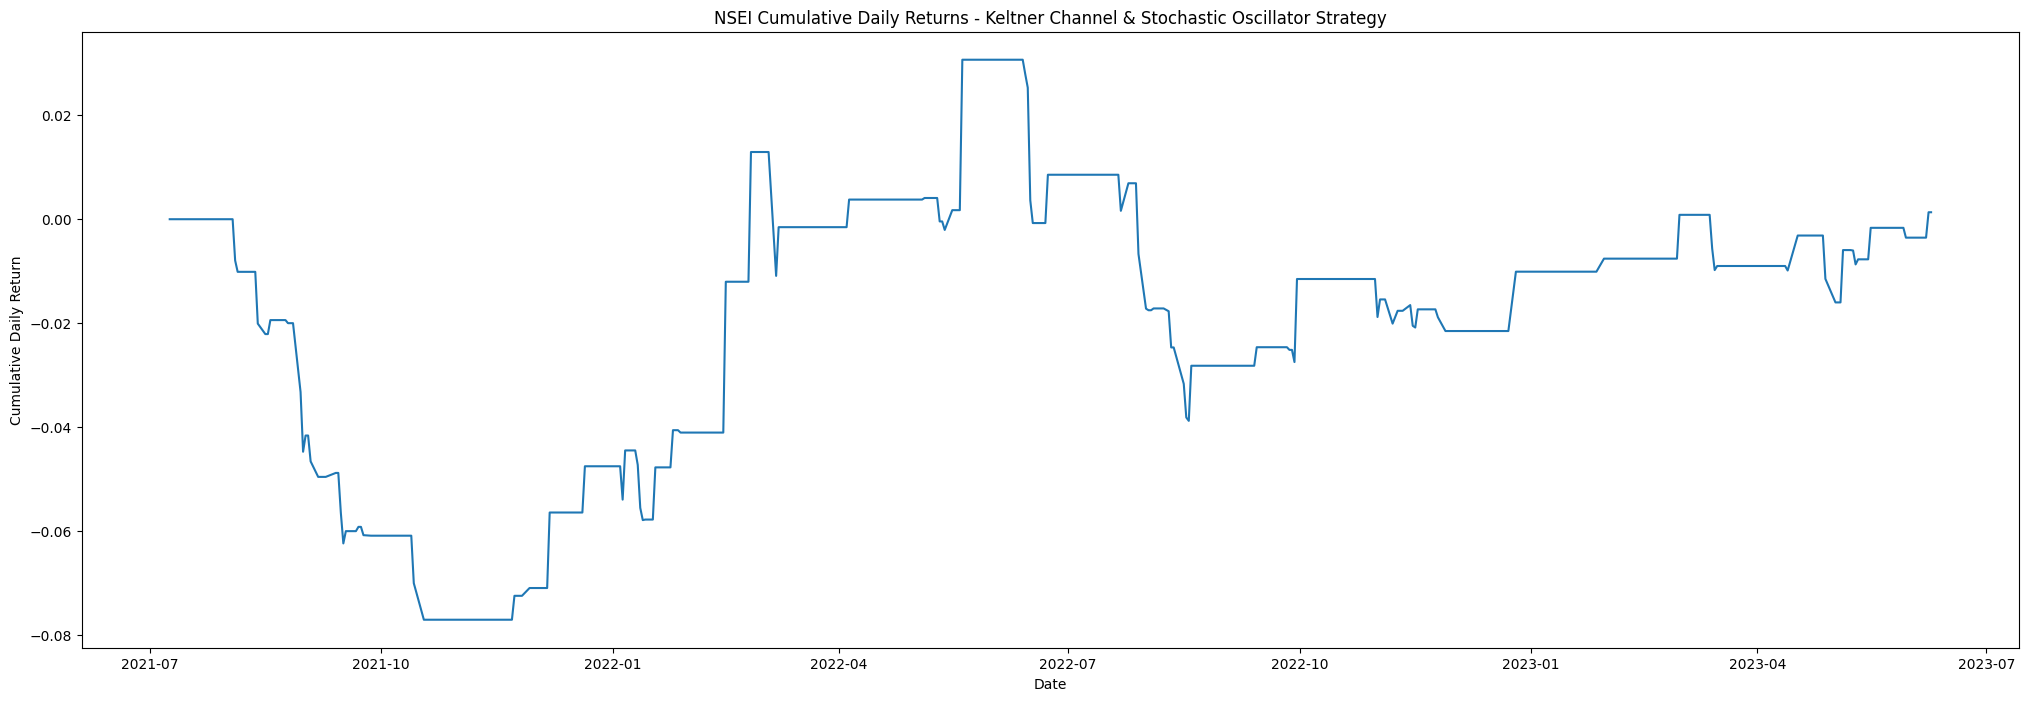

In [22]:
plt.figure(figsize=(25, 8))
plt.plot(index_data.tail(476).index, index_data['Cumulative_Return'].tail(476))
plt.title('NSEI Cumulative Daily Returns - Keltner Channel & Stochastic Oscillator Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Daily Return')
plt.show()

In [23]:
data['Mom_Signal'] = 0

#SELL
data.loc[(data['%K'] > data['%D']), 'Mom_Signal'] = -1

#BUY
data.loc[(data['%K'] < data['%D']), 'Mom_Signal'] = 1

print(data['Mom_Signal'].tail(496))

Date
2021-06-11    0
2021-06-14    0
2021-06-15    0
2021-06-16    0
2021-06-17    0
             ..
2023-06-05   -1
2023-06-06    1
2023-06-07    1
2023-06-08    1
2023-06-09    1
Name: Mom_Signal, Length: 496, dtype: int64


In [24]:
index_data['Mom_Signal'] = 0

#SELL
index_data.loc[(index_data['%K'] > index_data['%D']), 'Mom_Signal'] = -1

#BUY
index_data.loc[(index_data['%K'] < index_data['%D']), 'Mom_Signal'] = 1

print(index_data['Mom_Signal'].tail(496))

Date
2021-06-11    0
2021-06-14    0
2021-06-15    0
2021-06-16    0
2021-06-17    0
             ..
2023-06-05   -1
2023-06-06   -1
2023-06-07   -1
2023-06-08    1
2023-06-09    1
Name: Mom_Signal, Length: 496, dtype: int64


In [25]:
#daily strategy returns rate
data['Mom_Return'] = data['Mom_Signal'].shift(1) * data['Return']
index_data['Mom_Return'] = index_data['Mom_Signal'].shift(1) * index_data['Return']

#cumulative daily returns rate of strategy 
data['Mom_Cumulative_Return'] = (1 + data['Mom_Return']).cumprod() - 1
index_data['Mom_Cumulative_Return'] = (1 + index_data['Mom_Return']).cumprod() - 1

print(data['Mom_Return'].tail(495))
print("")
print(index_data['Mom_Return'].tail(495))
print("")
print(data['Mom_Cumulative_Return'].tail(495))
print("")
print(index_data['Mom_Cumulative_Return'].tail(495))

Date
2021-06-14    0.000000
2021-06-15    0.000000
2021-06-16    0.000000
2021-06-17    0.000000
2021-06-18    0.000000
                ...   
2023-06-05   -0.004234
2023-06-06    0.019548
2023-06-07    0.007779
2023-06-08   -0.004771
2023-06-09   -0.013135
Name: Mom_Return, Length: 495, dtype: float64

Date
2021-06-14    0.000000
2021-06-15    0.000000
2021-06-16   -0.000000
2021-06-17   -0.000000
2021-06-18   -0.000000
                ...   
2023-06-05   -0.003224
2023-06-06   -0.000277
2023-06-07   -0.006850
2023-06-08    0.004905
2023-06-09   -0.003818
Name: Mom_Return, Length: 495, dtype: float64

Date
2021-06-14    0.000000
2021-06-15    0.000000
2021-06-16    0.000000
2021-06-17    0.000000
2021-06-18    0.000000
                ...   
2023-06-05   -0.147294
2023-06-06   -0.130625
2023-06-07   -0.123862
2023-06-08   -0.128042
2023-06-09   -0.139496
Name: Mom_Cumulative_Return, Length: 495, dtype: float64

Date
2021-06-14    0.000000
2021-06-15    0.000000
2021-06-16    0.000000


In [26]:
data['Vol_Signal'] = 0

#SELL
data.loc[(data['Adj Close'] > data['Upper']), 'Vol_Signal'] = -1

#BUY
data.loc[(data['Adj Close'] < data['Lower']), 'Vol_Signal'] = 1

print(data['Vol_Signal'].tail(496))

Date
2021-06-11    0
2021-06-14    0
2021-06-15    0
2021-06-16    0
2021-06-17    0
             ..
2023-06-05    0
2023-06-06    0
2023-06-07    0
2023-06-08    0
2023-06-09    0
Name: Vol_Signal, Length: 496, dtype: int64


In [27]:
index_data['Vol_Signal'] = 0

#SELL
index_data.loc[(index_data['Adj Close'] > index_data['Upper']), 'Vol_Signal'] = -1

#BUY
index_data.loc[(index_data['Adj Close'] < index_data['Lower']), 'Vol_Signal'] = 1

print(index_data['Vol_Signal'].tail(496))

Date
2021-06-11    0
2021-06-14    0
2021-06-15    0
2021-06-16    0
2021-06-17    0
             ..
2023-06-05    0
2023-06-06    0
2023-06-07   -1
2023-06-08    0
2023-06-09    0
Name: Vol_Signal, Length: 496, dtype: int64


In [28]:
#daily strategy returns rate
data['Vol_Return'] = data['Vol_Signal'].shift(1) * data['Return']
index_data['Vol_Return'] = index_data['Vol_Signal'].shift(1) * index_data['Return']

#cumulative daily returns rate of strategy 
data['Vol_Cumulative_Return'] = (1 + data['Vol_Return']).cumprod() - 1
index_data['Vol_Cumulative_Return'] = (1 + index_data['Vol_Return']).cumprod() - 1

print(data['Vol_Return'].tail(495))
print("")
print(index_data['Vol_Return'].tail(495))
print("")
print(data['Vol_Cumulative_Return'].tail(495))
print("")
print(index_data['Vol_Cumulative_Return'].tail(495))

Date
2021-06-14    0.0
2021-06-15    0.0
2021-06-16    0.0
2021-06-17    0.0
2021-06-18    0.0
             ... 
2023-06-05    0.0
2023-06-06   -0.0
2023-06-07    0.0
2023-06-08   -0.0
2023-06-09   -0.0
Name: Vol_Return, Length: 495, dtype: float64

Date
2021-06-14    0.000000
2021-06-15    0.000000
2021-06-16   -0.000000
2021-06-17   -0.000000
2021-06-18   -0.000000
                ...   
2023-06-05    0.000000
2023-06-06    0.000000
2023-06-07    0.000000
2023-06-08    0.004905
2023-06-09   -0.000000
Name: Vol_Return, Length: 495, dtype: float64

Date
2021-06-14    0.000000
2021-06-15    0.000000
2021-06-16    0.000000
2021-06-17    0.000000
2021-06-18    0.000000
                ...   
2023-06-05   -0.008387
2023-06-06   -0.008387
2023-06-07   -0.008387
2023-06-08   -0.008387
2023-06-09   -0.008387
Name: Vol_Cumulative_Return, Length: 495, dtype: float64

Date
2021-06-14    0.000000
2021-06-15    0.000000
2021-06-16    0.000000
2021-06-17    0.000000
2021-06-18    0.000000
         

In [29]:
#return is basically profit
#return rate at end of overall period is last value of 'Cumulative_Return'
total_profit_percenatge = (data['Strategy_Return'].tail(495)).sum() * 100
total_profit_percenatge_index = (index_data['Strategy_Return'].tail(495)).sum() * 100
total_profit_percenatge_Mom = (data['Mom_Return'].tail(495)).sum() * 100
total_profit_percenatge_Vol = (data['Vol_Return'].tail(495)).sum() * 100
total_profit_percenatge_Mom_index = (index_data['Mom_Return'].tail(495)).sum() * 100
total_profit_percenatge_Vol_index = (index_data['Vol_Return'].tail(495)).sum() * 100

print('Total Profit of stock using the combined strategy is:', total_profit_percenatge, '%')
print('Total Profit of index using the combined strategy is:', total_profit_percenatge_index, '%')
print('Total Profit of stock using just Momentum Indicator is:', total_profit_percenatge_Mom, '%')
print('Total Profit of index using just Momentum Indicator is:', total_profit_percenatge_Mom_index, '%')
print('Total Profit of stock using just Volatality Indicator is:', total_profit_percenatge_Vol, '%')
print('Total Profit of index using just Volatality Indicator is:', total_profit_percenatge_Vol_index, '%')

Total Profit of stock using the combined strategy is: -0.2604932655554171 %
Total Profit of index using the combined strategy is: 0.47760992596918017 %
Total Profit of stock using just Momentum Indicator is: -9.07281742830417 %
Total Profit of index using just Momentum Indicator is: -40.40652965831859 %
Total Profit of stock using just Volatality Indicator is: -0.8017808012066641 %
Total Profit of index using just Volatality Indicator is: 6.627289771988554 %


In [30]:
#beta
covariance = np.cov(data['Strategy_Return'].tail(495),index_data['Strategy_Return'].tail(495))[0,1]
variance = np.var(index_data['Strategy_Return'].tail(495))
beta = covariance/variance
covariance_Mom = np.cov(data['Mom_Return'].tail(495),index_data['Mom_Return'].tail(495))[0,1]
variance_Mom = np.var(index_data['Mom_Return'].tail(495))
beta_Mom = covariance/variance
covariance_Vol = np.cov(data['Vol_Return'].tail(495),index_data['Vol_Return'].tail(495))[0,1]
variance_Vol = np.var(index_data['Vol_Return'].tail(495))
beta_Vol = covariance/variance

print('Beta for combined strategy:', beta)
print('Beta for just Momentum Indicator:', beta_Mom)
print('Beta for just Volatality Indicator:', beta_Vol)

Beta for combined strategy: 3.6485922845229485e-06
Beta for just Momentum Indicator: 3.6485922845229485e-06
Beta for just Volatality Indicator: 3.6485922845229485e-06


In [31]:
#CAPM is per year
risk_free_rate = Rf = 0.05
average_market_return = Rm = index_data['Strategy_Return'].tail(495).mean() 
market_premium = Rm-Rf
expected_return = Rf + beta * (market_premium)
average_market_return_Mom = Rm_Mom = index_data['Mom_Return'].tail(495).mean() 
market_premium_Mom = Rm_Mom-Rf
expected_return_Mom = Rf + beta_Mom * (market_premium_Mom)
average_market_return_Vol = Rm_Vol = index_data['Vol_Return'].tail(495).mean() 
market_premium_Vol = Rm_Vol-Rf
expected_return_Vol = Rf + beta_Vol * (market_premium_Vol)

print('Average Expected Return from combined strategy:', expected_return, '%')
print('Average Expected Return from just Momentum Indicator:', expected_return_Mom, '%')
print('Average Expected Return from just Volatality Indicator:', expected_return_Vol, '%')

Average Expected Return from combined strategy: 0.04999981760558989 %
Average Expected Return from just Momentum Indicator: 0.049999814592063506 %
Average Expected Return from just Volatality Indicator: 0.049999818058876246 %


In [32]:
#alpha is for year
average_stock_return = data['Strategy_Return'].tail(495).mean()
alpha = average_stock_return - expected_return
average_stock_return_Mom = data['Mom_Return'].tail(495).mean()
alpha_Mom = average_stock_return_Mom - expected_return_Mom
average_stock_return_Vol = data['Vol_Return'].tail(495).mean()
alpha_Vol = average_stock_return_Vol - expected_return_Vol

print('Alpha from combined strategy:', alpha)
print('Alpha from just Momentum Indicator:', alpha_Mom)
print('Alpha from just Volatality Indicator:', alpha_Vol)

Alpha from combined strategy: -0.05000508009580314
Alpha from just Momentum Indicator: -0.050183103833039346
Alpha from just Volatality Indicator: -0.05001601565081981


In [33]:
#sharpe ratio
annual_volatality = data['Strategy_Return'].tail(495).std()
sharpe_ratio = (average_market_return - risk_free_rate) / annual_volatality
annual_volatality_Mom = data['Mom_Return'].tail(495).std()
sharpe_ratio_Mom = (average_market_return_Mom - risk_free_rate) / annual_volatality_Mom
annual_volatality_Vol = data['Vol_Return'].tail(495).std()
sharpe_ratio_Vol = (average_market_return_Vol - risk_free_rate) / annual_volatality_Vol

print('Sharpe Ratio from combined strategy:', sharpe_ratio)
print('Sharpe Ratio from just Momentum Indicator:', sharpe_ratio_Mom)
print('Sharpe Ratio from just Volatality Indicator:', sharpe_ratio_Vol)

Sharpe Ratio from combined strategy: -135.9174558983441
Sharpe Ratio from just Momentum Indicator: -3.277746388972131
Sharpe Ratio from just Volatality Indicator: -39.082944424651835
